This notebook shows how to generate the benchmark plots used in the paper. 

To generate the plots using the benchmarks of the original paper, download the following gist:

[stavros11/ffb88a5b914b60213515f0256c0e8aa4](https://gist.github.com/stavros11/ffb88a5b914b60213515f0256c0e8aa4)

copy the contents in a folder named `/data` in the directory of this notebook and execute all cells.

The logs provided in the gist serve as a template.
The same plotting functionality should work with logs generated from different machines.
To generate new logs from scratch one can use the bash scripts provided in the `scripts/` directory.

In [4]:
from utils import load_data, load_evolution_data

save = False # if ``True`` plots will be saved in the current directory as pdfs

In [37]:

# Trial code with GPU libraries commented out

#from utils import load_data, load_evolution_data

#save = False # if ``True`` plots will be saved in the current directory as pdfs

#import seaborn as sns
#from libraries import Library, plot_libraries

#cpu_data = load_data(r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\libraries_cpu.dat")
#gpu_data = load_data("./data/libraries_gpu.dat")
#gpu_data = load_data(r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\libraries_gpu.dat")

#palette = sns.color_palette("bright", 7)
#libraries = [
#    Library("qibo", palette[0], "/", "Qibo"),
#   Library("qibo GPU", palette[0], "/", "Qibo GPU"),
#   Library("qiskit", palette[1], "-", "Qiskit"),
#   Library("qiskit-gpu GPU", palette[1], "-", "Qiskit GPU"),
#   Library("hybridq", palette[2], "x", "HybridQ"),
#   Library("hybridq-gpu GPU", palette[2], "x", "HybridQ GPU"),
#   Library("qulacs", palette[4], "\\", "Qulacs", has_single=False),
#   Library("qulacs-gpu GPU", palette[4], "\\", "Qulacs GPU", has_single=False),
#   Library("projectq", palette[3], "o", "ProjectQ", has_single=False),
#   Library("qcgpu GPU", palette[3], "o", "QCGPU", has_double=False)
#]

#plot_libraries(libraries, cpu_data, cpu_data, "total_dry_time", 20, precision="single", legend=False, save=save)
#plot_libraries(libraries, cpu_data, cpu_data, "total_dry_time", 10, precision="double", legend=True, save=save)

#plot_libraries(libraries, cpu_data, cpu_data, "total_dry_time", 20, precision="double", legend=False, save=save)
#plot_libraries(libraries, cpu_data, cpu_data, "total_dry_time", 30, precision="double", legend=True, save=save)

## Figure 3

Bar plot with import breakdown and dry run vs simulation comparison for qibojit.

In [ ]:
from barplots import plot_breakdown_nqubits

data = load_data(f"./data/qibojit_breakdown.dat")
plot_breakdown_nqubits(data, "supremacy", save=save)

## Figure 4

Scaling plots of execution time as a function of the number of qubits for all qibo backends.

In [ ]:
from scaling import plot_scaling

cpu_data = load_data("./data/qibo_scaling_cpu.dat")
gpu_data = load_data("./data/qibo_scaling_gpu.dat")

plot_scaling(cpu_data, gpu_data, "qft", "total_dry_time", legend=False, save=save)
plot_scaling(cpu_data, gpu_data, "qft", "total_simulation_time", save=save)

FileNotFoundError: [Errno 2] No such file or directory: './data/qibo_scaling_cpu.dat'

## Figure 5

qibojit backend performance on different CPU and GPU devices.

In [ ]:
import seaborn as sns # used for color palettes
from devices import Line, plot_devices

oranges = sns.color_palette("Oranges", 2)
greens = sns.color_palette("Greens", 2)
blues = sns.color_palette("Blues", 3)

lines = [
    Line("NVIDIA RTX A6000 (cupy)", load_data("./data/qibo_scaling_gpu.dat", qibojit_only=True), blues[2], "o"),
    Line("NVIDIA DGX V100 (cupy)", load_data("./data/dgx_qibojit.dat", qibojit_only=True), blues[1], "^"),
    Line("NVIDIA GTX 1650 (cupy)", load_data("./data/gtx1650_qibojit.dat", qibojit_only=True), blues[0], "d"),
    Line("AMD Radeon VII (cupy)", load_data("./data/rocm_qibojit.dat"), greens[1], "v"),
    Line("NVIDIA RTX A6000 (cupy-multigpu)", load_data("./data/rtx_multigpu.dat", qibojit_only=True), blues[2], "o", linestyle="--"),
    Line("AMD EPYC 7742, 128 th., 2TB (numba)", load_data("./data/qibo_scaling_cpu.dat", qibojit_only=True), oranges[1], ""),
    Line("ATOS QLM, 384 th., 6TB (numba)", load_data("./data/qlm_qibojit.dat", qibojit_only=True), oranges[0], ""),
]
# filter qibojit-cupy only data if the log file contains more (eg. qibojit-cuquantum)
is_cupy = lines[0].data["library_options"].apply(lambda x: "cupy" in x)
lines[0].data = lines[0].data[is_cupy == True]

plot_devices(lines, "qft", "total_dry_time", save=save)
plot_devices(lines, "qft", "total_simulation_time", legendfont=26, save=save)

## Figure 6

Bar plot with different multigpu configurations and qibojit vs qibotf comparison.

In [ ]:
from barplots import plot_multigpu

data = load_data("./data/dgx_multigpu.dat")
plot_multigpu(data, 32, "total_dry_time", save=save)
plot_multigpu(data, 32, "total_simulation_time", legend=True, save=save)

## Figure 7

Bar plot with comparisons between different simulation libraries on various circuits.

c:\Users\nithy\Desktop\qibo-benchmarks-nith\plots\libraries.py:52: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  height = np.array([float(data[condition & (data["circuit"] == c)][quantity]) for c in circuits])


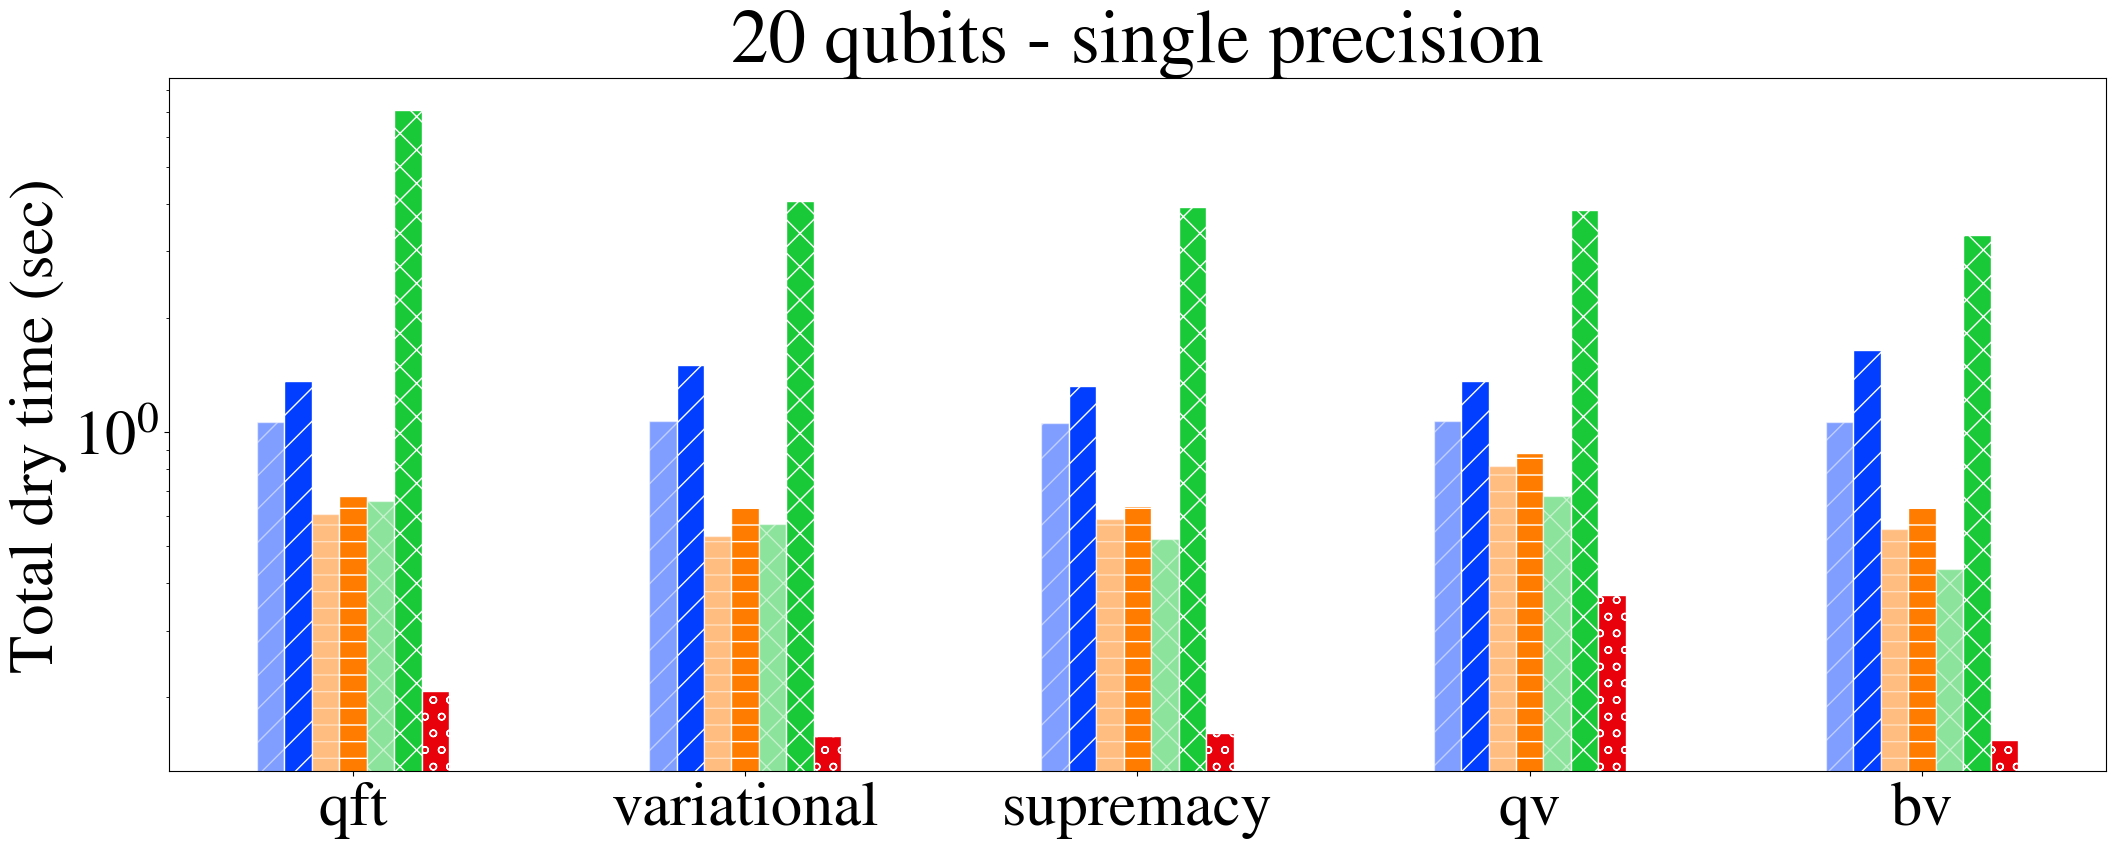

c:\Users\nithy\Desktop\qibo-benchmarks-nith\plots\libraries.py:52: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  height = np.array([float(data[condition & (data["circuit"] == c)][quantity]) for c in circuits])


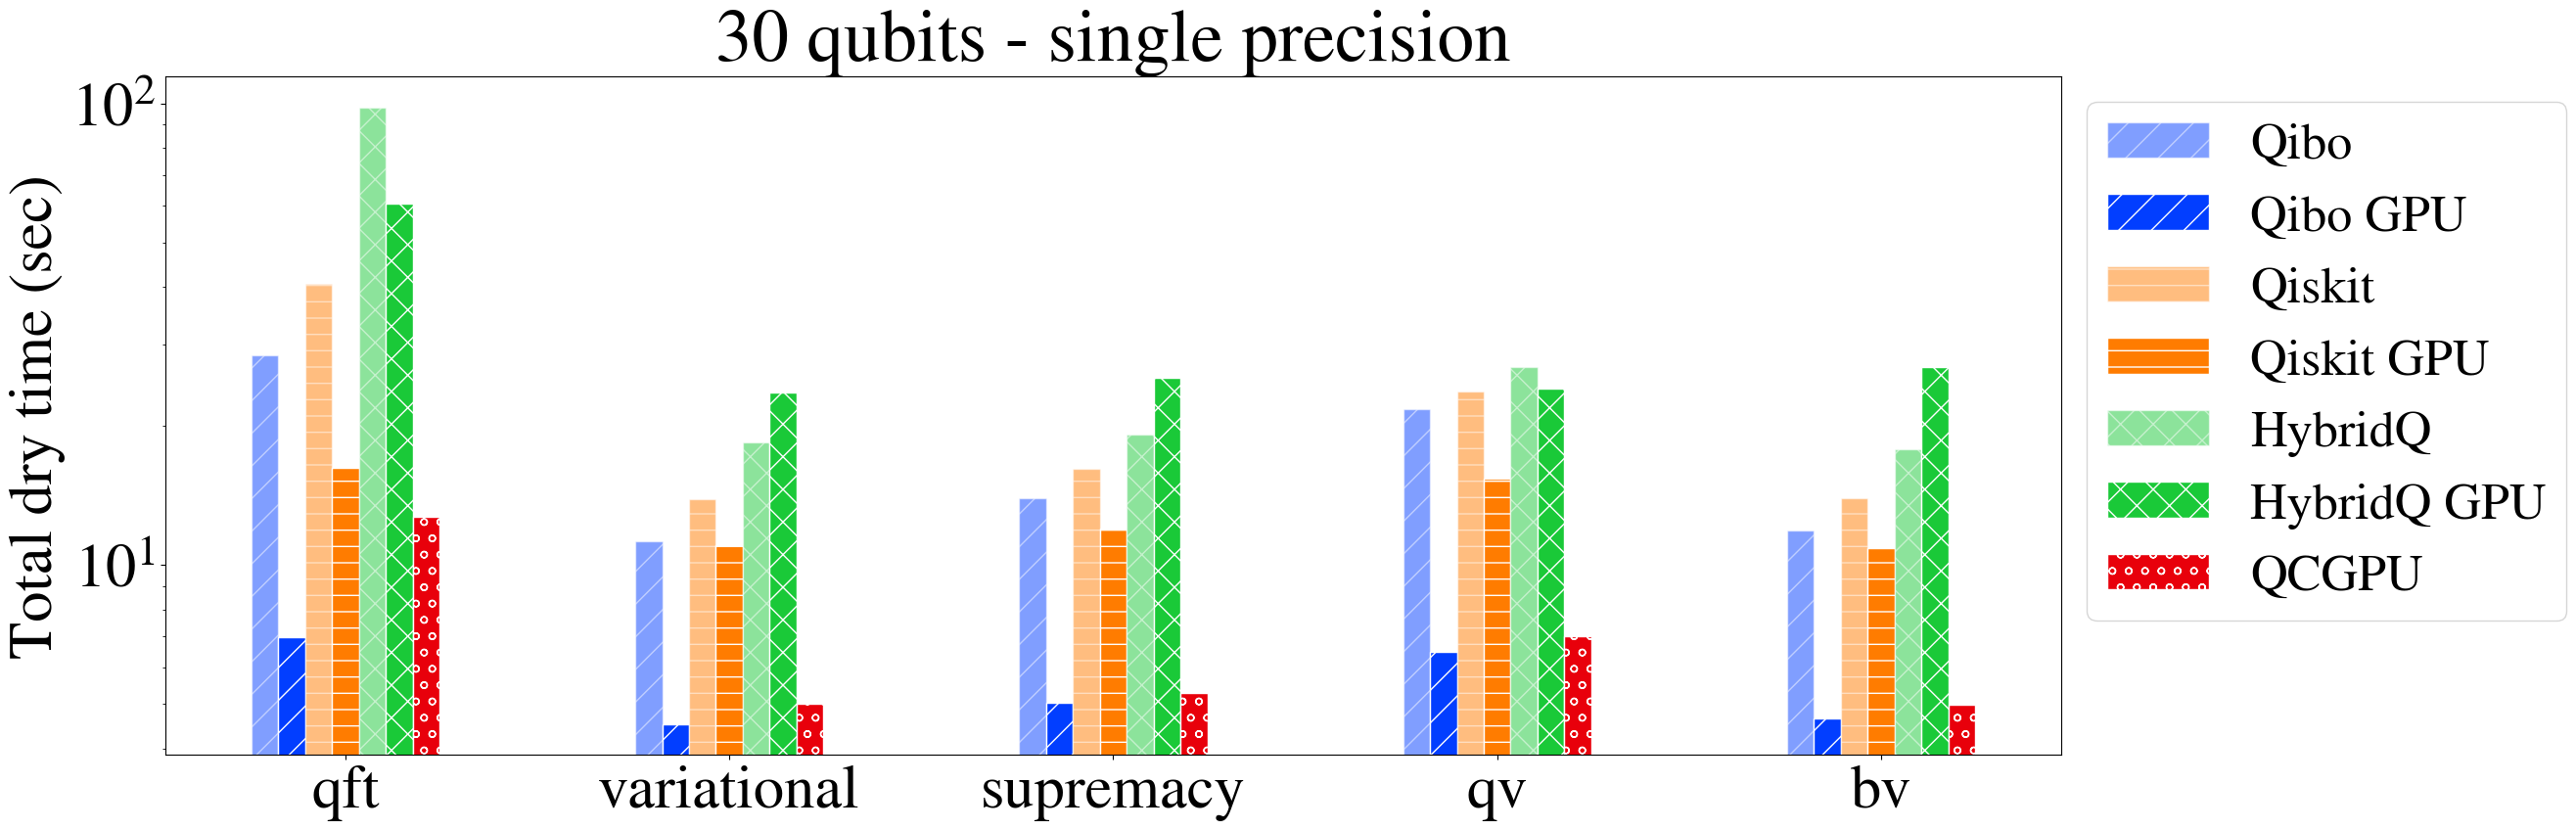

c:\Users\nithy\Desktop\qibo-benchmarks-nith\plots\libraries.py:52: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  height = np.array([float(data[condition & (data["circuit"] == c)][quantity]) for c in circuits])


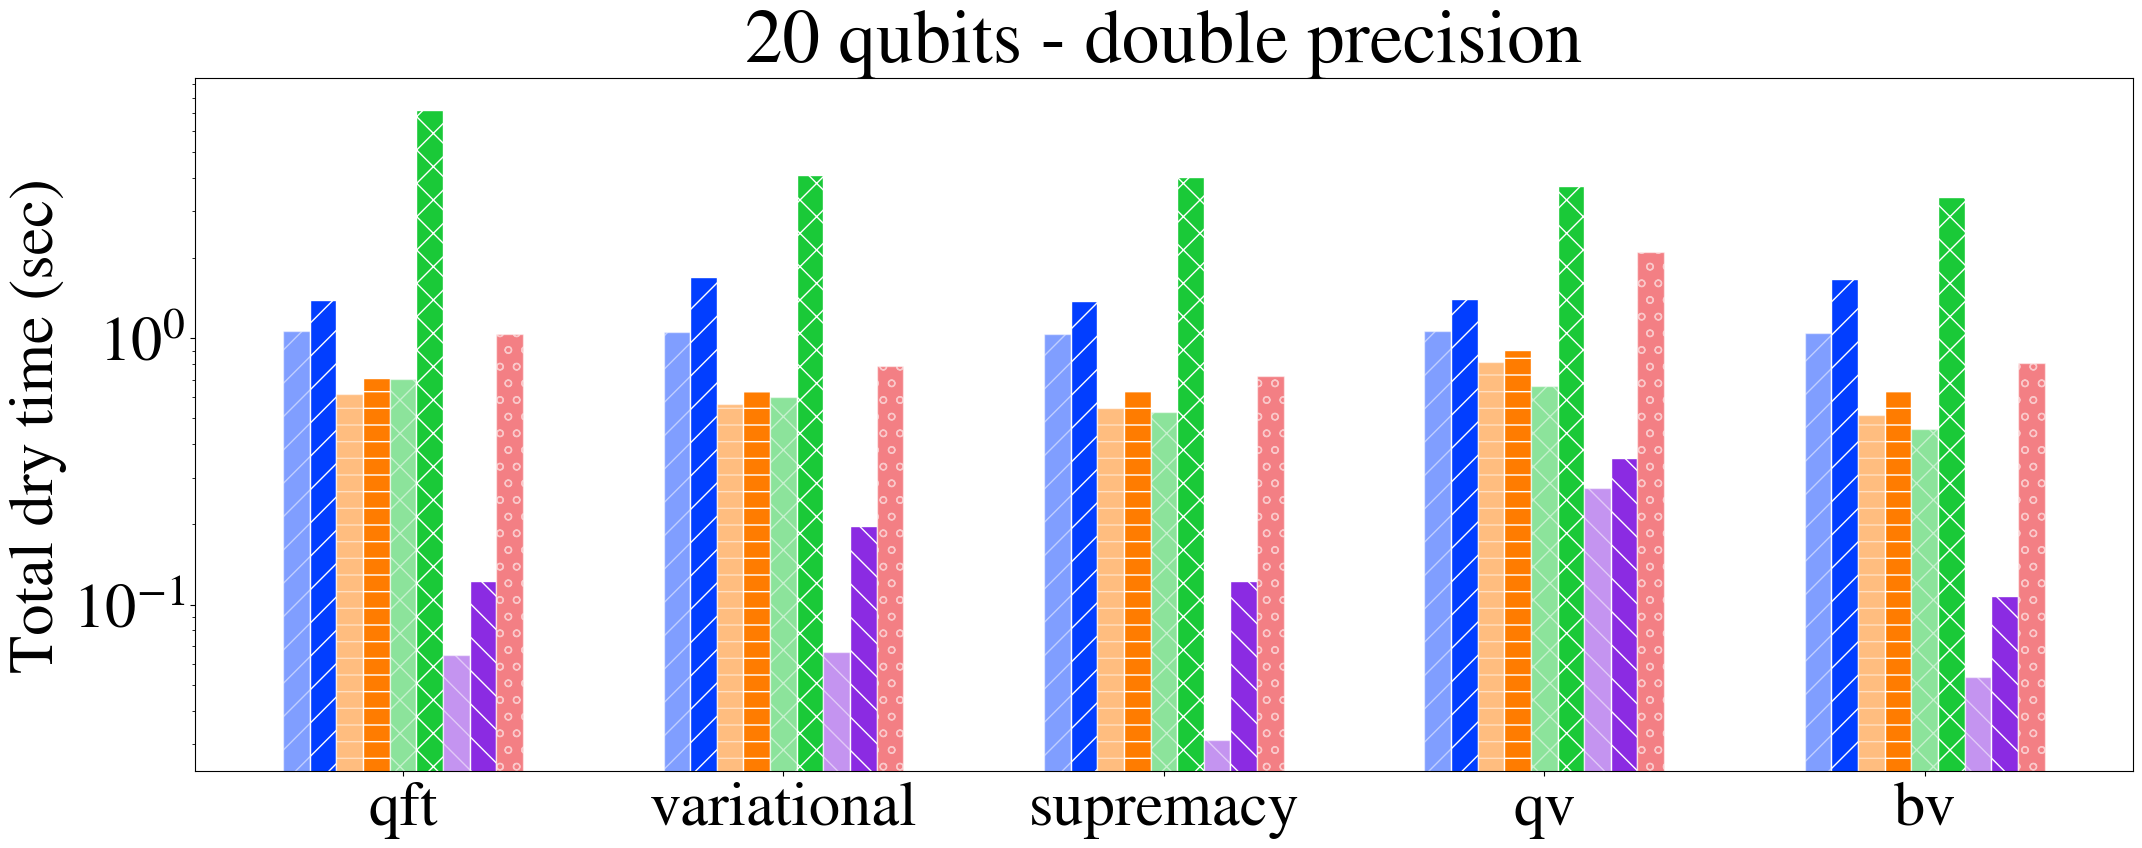

c:\Users\nithy\Desktop\qibo-benchmarks-nith\plots\libraries.py:52: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  height = np.array([float(data[condition & (data["circuit"] == c)][quantity]) for c in circuits])


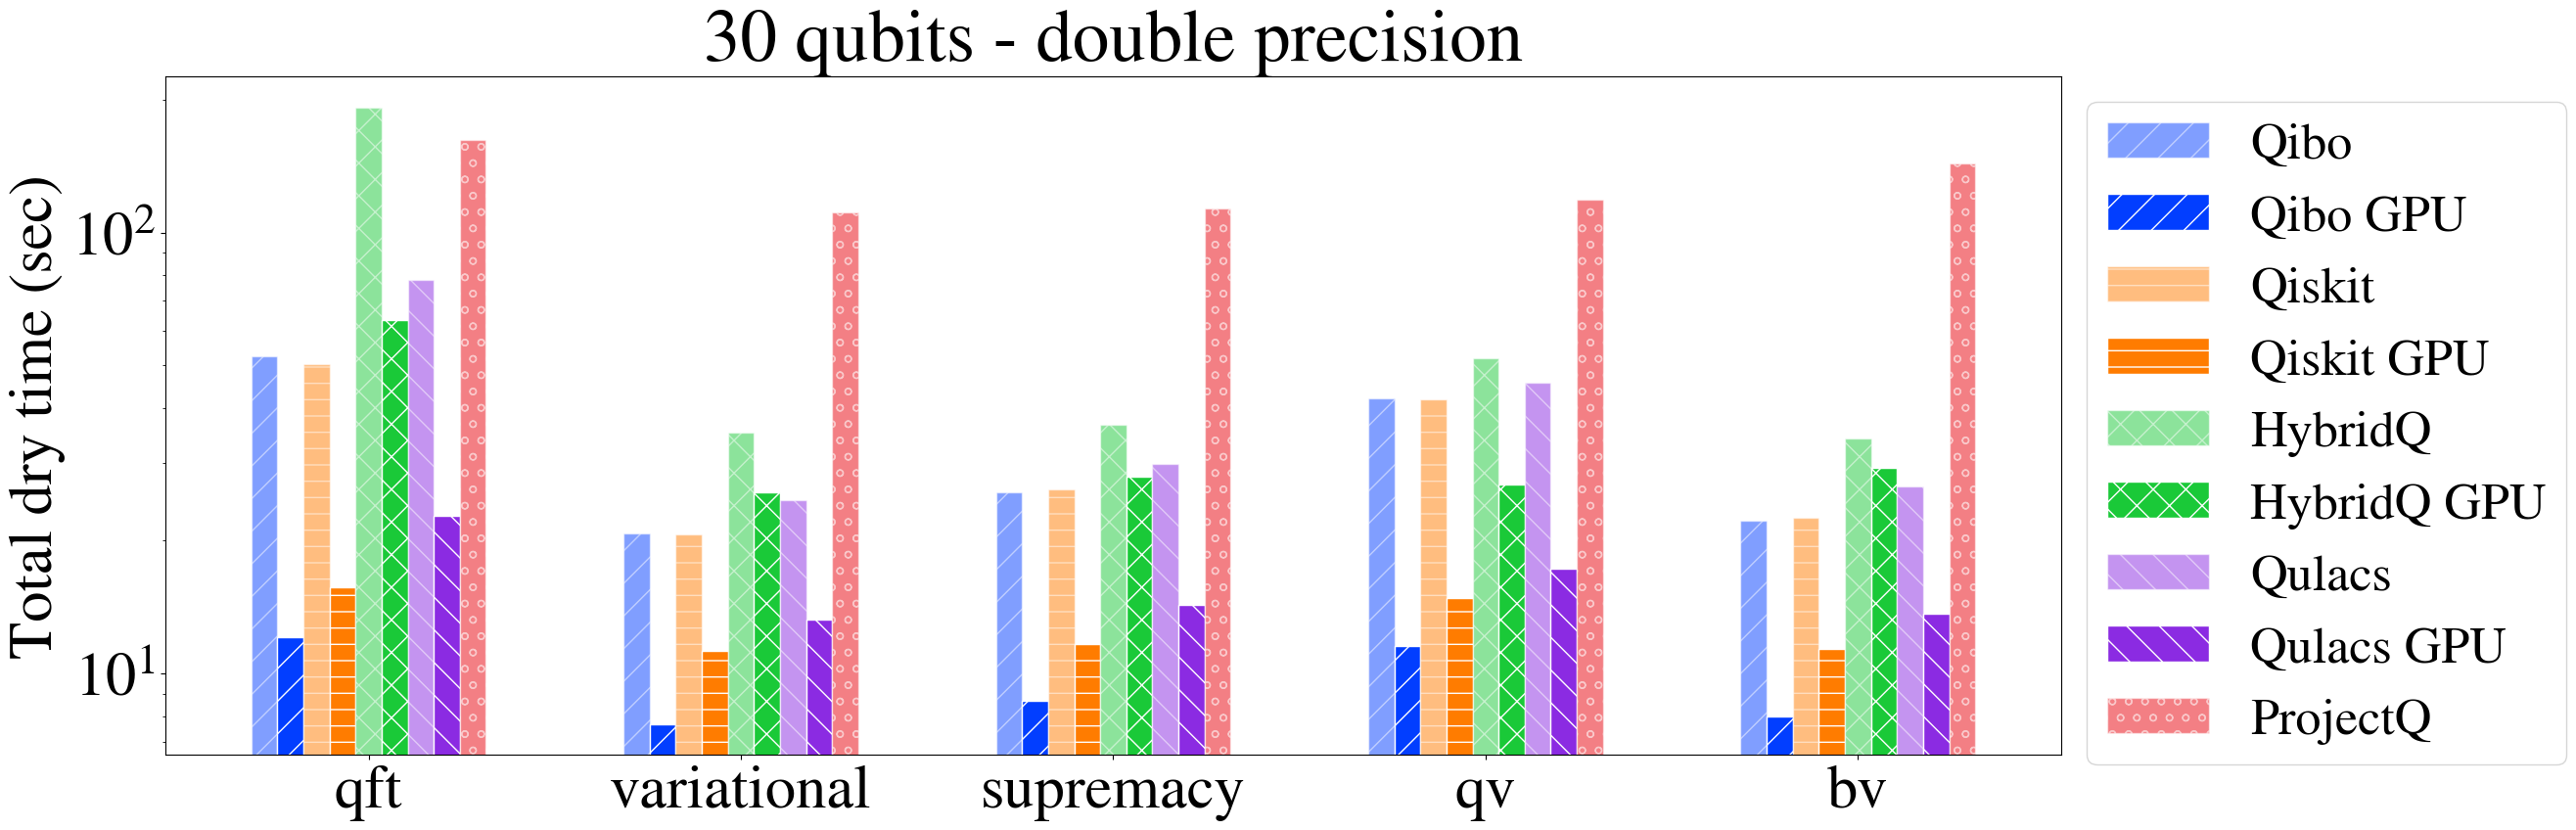

In [27]:
import seaborn as sns
from libraries import Library, plot_libraries

cpu_data = load_data(r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\lib_cpu_starvos.dat")
gpu_data = load_data(r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\starvos_gpu_libs.dat")

palette = sns.color_palette("bright", 7)
libraries = [
    Library("qibo", palette[0], "/", "Qibo"),
    Library("qibo GPU", palette[0], "/", "Qibo GPU"),
    Library("qiskit", palette[1], "-", "Qiskit"),
    Library("qiskit-gpu GPU", palette[1], "-", "Qiskit GPU"),
    Library("hybridq", palette[2], "x", "HybridQ"),
    Library("hybridq-gpu GPU", palette[2], "x", "HybridQ GPU"),
    Library("qulacs", palette[4], "\\", "Qulacs", has_single=False),
    Library("qulacs-gpu GPU", palette[4], "\\", "Qulacs GPU", has_single=False),
    Library("projectq", palette[3], "o", "ProjectQ", has_single=False),
    Library("qcgpu GPU", palette[3], "o", "QCGPU", has_double=False)
]

plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 20, precision="single", legend=False, save=save)
plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 30, precision="single", legend=True, save=save)

plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 20, precision="double", legend=False, save=save)
plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 30, precision="double", legend=True, save=save)

RuntimeError: matplotlib does not support generators as input

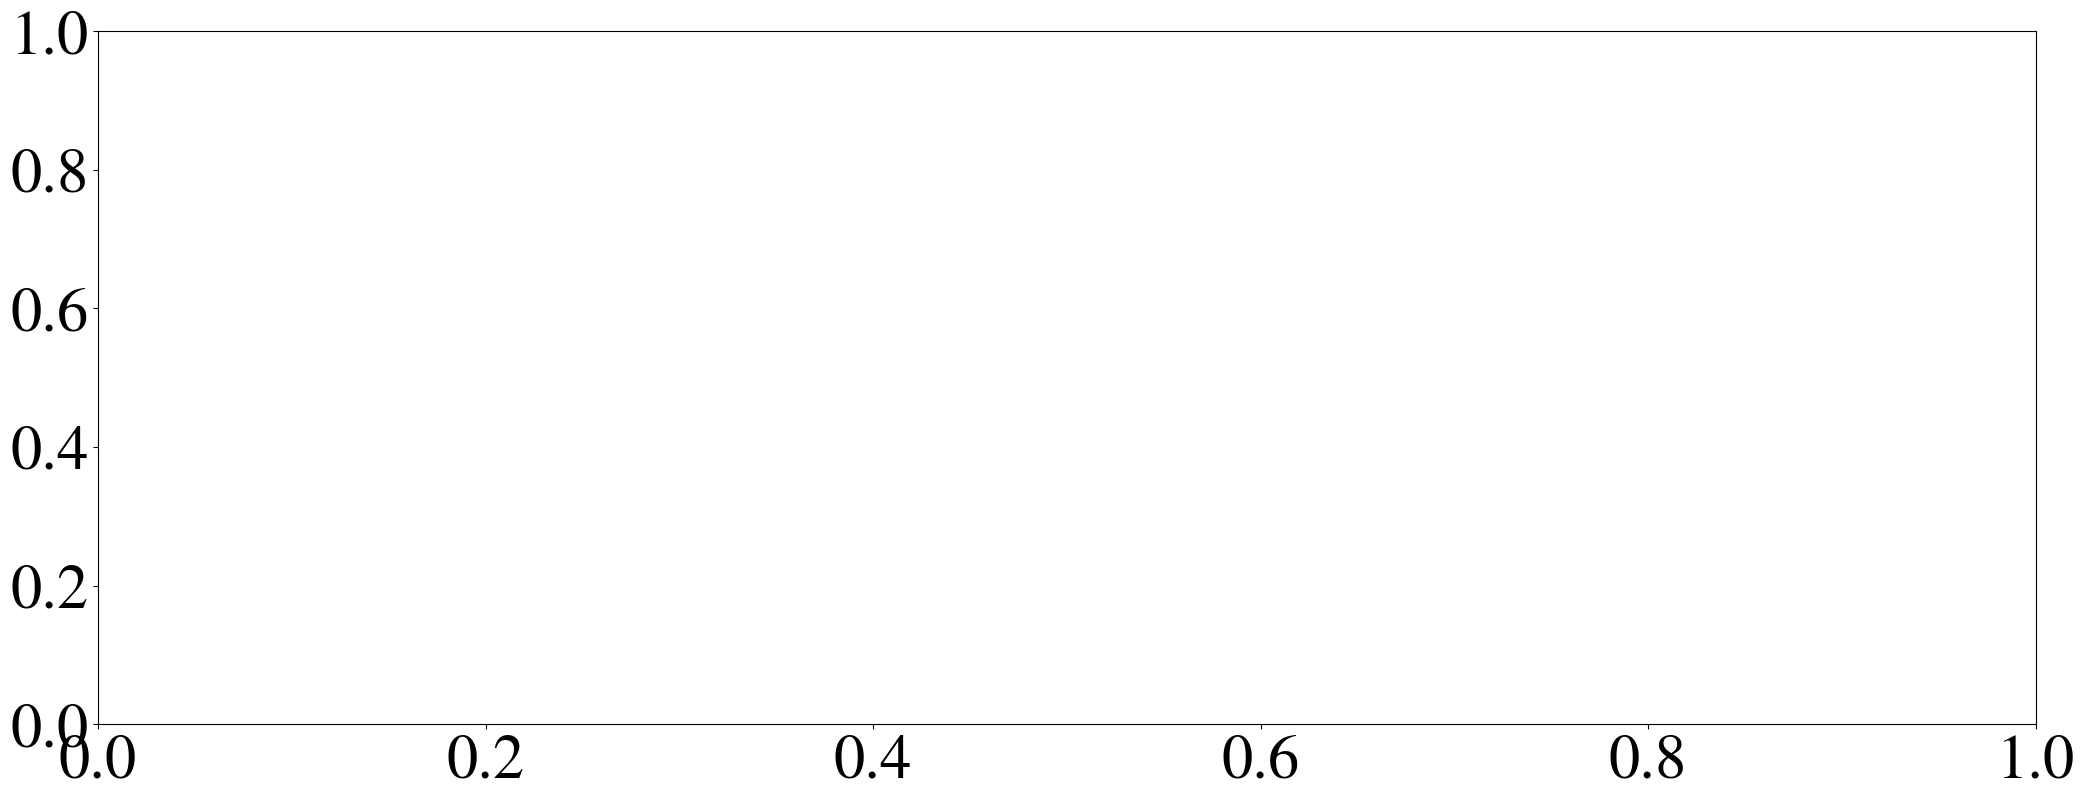

In [109]:
import seaborn as sns
from libraries import Library, plot_libraries
import libraries as implibpy

cpu_data = load_data(r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\file.dat")
gpu_data = load_data(r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\file.dat")

palette = sns.color_palette("bright", 2)
libraries = [
    Library("qibo", palette[0], "/", "Qibo"),
    #Library("qibo GPU", palette[0], "/", "Qibo GPU"),
    Library("qiskit", palette[1], "-", "Qiskit"),
    #Library("qiskit-gpu GPU", palette[1], "-", "Qiskit GPU"),
    #Library("hybridq", palette[2], "x", "HybridQ"),
    #Library("hybridq-gpu GPU", palette[2], "x", "HybridQ GPU"),
    #Library("qulacs", palette[4], "\\", "Qulacs", has_single=False),
    #Library("qulacs-gpu GPU", palette[4], "\\", "Qulacs GPU", has_single=False),
    #Library("projectq", palette[3], "o", "ProjectQ", has_single=False),
    #Library("qcgpu GPU", palette[3], "o", "QCGPU", has_double=False)
]

#plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 10, precision="single", legend=False, save=save)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools

# Define your parameters
libraries = ["qibo", "qiskit"]  # Manually defined list of libraries
cpu_data = (r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\file.dat")
gpu_data = (r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\file.dat")
quantity = "total_dry_time"  # Specify the quantity
nqubits = 10  # Specify the number of qubits
precision = "double"  # Specify the precision
width = 0.07  # Specify the width
fontsize = 45  # Specify the font size
legend = True  # Specify whether to show legend
logscale = True  # Specify whether to use log scale
fusion = False  # Specify whether to use fusion
save = False  # Specify whether to save the plot

data = cpu_data

# matplotlib.rcParams["font.size"] = fontsize

lib_params = []
for lib in libraries:
    color = "blue" if lib == "qibo" else "green"
    hatch = "/" if lib == "qibo" else "\\"
    label = "Qibo" if lib == "qibo" else "Qiskit"
    alpha = 0.5
    lib_params.append(color)
    lib_params.append(hatch)
    lib_params.append(label)
    lib_params.append(alpha)

# Process data

circuits = ["qft", "variational", "supremacy", "qv", "bv"]
# create widths list for bar positioning
n = len([library for library in libraries])
ws = np.arange(n)
ws = iter((ws - ws[n // 2]) * width)

# Plot the results
xvalues = np.array(range(len(circuits)))
plt.figure(figsize=(25, 9))
#base_condition = 
x_positions = []
for x in xvalues:
    try:
    
        x_positions.append(x + next(iter((np.arange(n)- np.arange(n)[n // 2]) * width)))
    except StopIteration:
        # Handle the case when the generator is exhausted
        # For example, you could break out of the loop or add a default value
        break
x_positions = list(x_positions)


'''x_positions = []
for x in xvalues:
    try:
        ws = np.arange(n)
        offset = next(iter((ws - ws[n // 2]) * width)) - next(iter((ws - ws[n // 2]) * width))  # Subtract the middle element from ws
        x_positions.append(x + offset * width)  # Multiply the result by width and add to x
    except StopIteration:
        # Handle the case when the generator is exhausted
        # For example, you could break out of the loop or add a default value
        break
'''

for library in libraries:
    if library:
        #condition = base_condition & 
        height = np.array([float((cpu_data[1] == 10) & (cpu_data[5] == library) & (cpu_data[6] == precision) & (cpu_data[9] == c))][quantity] for c in circuits)
        
        plt.bar(x_positions, height, align="center", 
                    width=width, label=library, 
                    log=logscale, edgecolor='w')

if fusion:
    plt.title(f"{nqubits} qubits - Two-qubit fusion - {precision} precision")
else:
    plt.title(f"{nqubits} qubits - {precision} precision")
if quantity == "total_dry_time":
    plt.ylabel("Total dry time (sec)")
elif quantity == "total_simulation_time":
    plt.ylabel("Total simulation time (sec)")

plt.xticks(xvalues, circuits)
if legend:
    plt.legend(fontsize="small", bbox_to_anchor=(1,1))
#if save:
#    savename = "libraries_fusion" if fusion else "libraries"
#    plt.savefig(f"{savename}_{precision}_{nqubits}qubits_{quantity}.pdf", bbox_inches="tight")
else:
    plt.show()



  


## Figure 8

Bar plot comparing fusion vs no fusion for all qibojit platforms and circuits

In [ ]:
from fusion import plot_fusion_circuits

data = load_data(f"./data/qibojit_fusion.dat")
plot_fusion_circuits(data, 30, "total_dry_time", fontsize=38, legend=True, save=True)
plot_fusion_circuits(data, 30, "total_simulation_time", fontsize=38, legend=True, save=save)

## Figure 9

Bar plot comparing two-qubit fusion for different libraries (qibo, qiskit, qsim).

c:\Users\nithy\Desktop\qibo-benchmarks-nith\plots\libraries.py:52: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  height = np.array([float(data[condition & (data["circuit"] == c)][quantity]) for c in circuits])


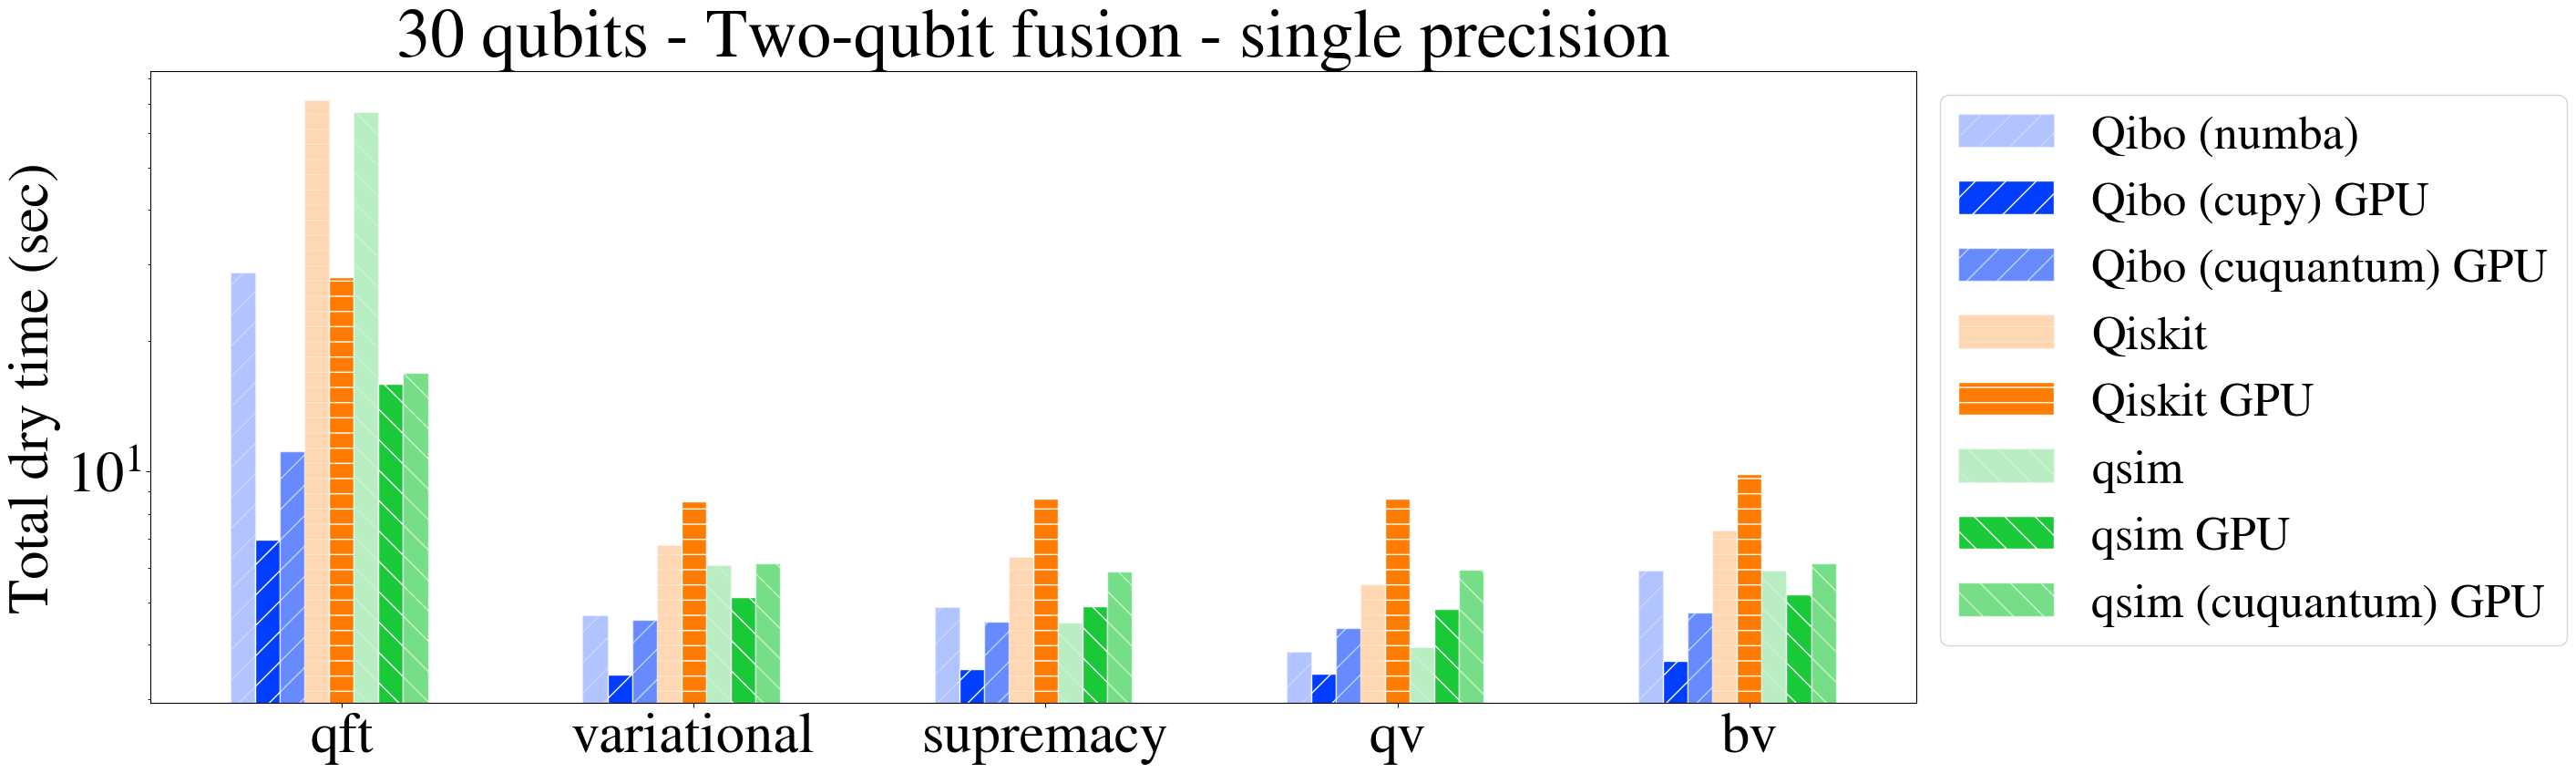

In [34]:
import seaborn as sns
from libraries import Library, plot_libraries

cpu_data = load_data(r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\libraries_fusion_cpu.dat")
gpu_data = load_data(r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\libraries_fusion_gpu.dat")

palette = sns.color_palette("bright", 7)
libraries = [
    Library("qibo", palette[0], "/", "Qibo (numba)", alpha=0.3),
    Library("qibo GPU", palette[0], "/", "Qibo (cupy) GPU", alpha=1.0),
    Library("qibo-cuquantum GPU", palette[0], "/", "Qibo (cuquantum) GPU", alpha=0.6),
    Library("qiskit", palette[1], "-", "Qiskit", alpha=0.3),
    Library("qiskit-gpu GPU", palette[1], "-", "Qiskit GPU", alpha=1.0),
    Library("qsim", palette[2], "\\", "qsim", has_double=False, alpha=0.3),
    Library("qsim-gpu GPU", palette[2], "\\", "qsim GPU", has_double=False, alpha=1.0),
    Library("qsim-cuquantum GPU", palette[2], "\\", "qsim (cuquantum) GPU", has_double=False, alpha=0.6),
]

plot_libraries(libraries, cpu_data, gpu_data, "total_dry_time", 30, precision="single", 
               legend=True, fontsize=45, logscale=True, fusion=True, save=save)

## Figure 10

Scaling plot vs time dt for adiabatic evolution of TFIM Hamiltonian using the dense form.

In [ ]:
from evolution import plot_dense

data = load_evolution_data("data/evolution.dat")
plot_dense(data, "total_dry_time", 10, save=save)

## Figure 11

Scaling plot vs time dt for adiabatic evolution of TFIM Hamiltonian using the Trotter decomposition.

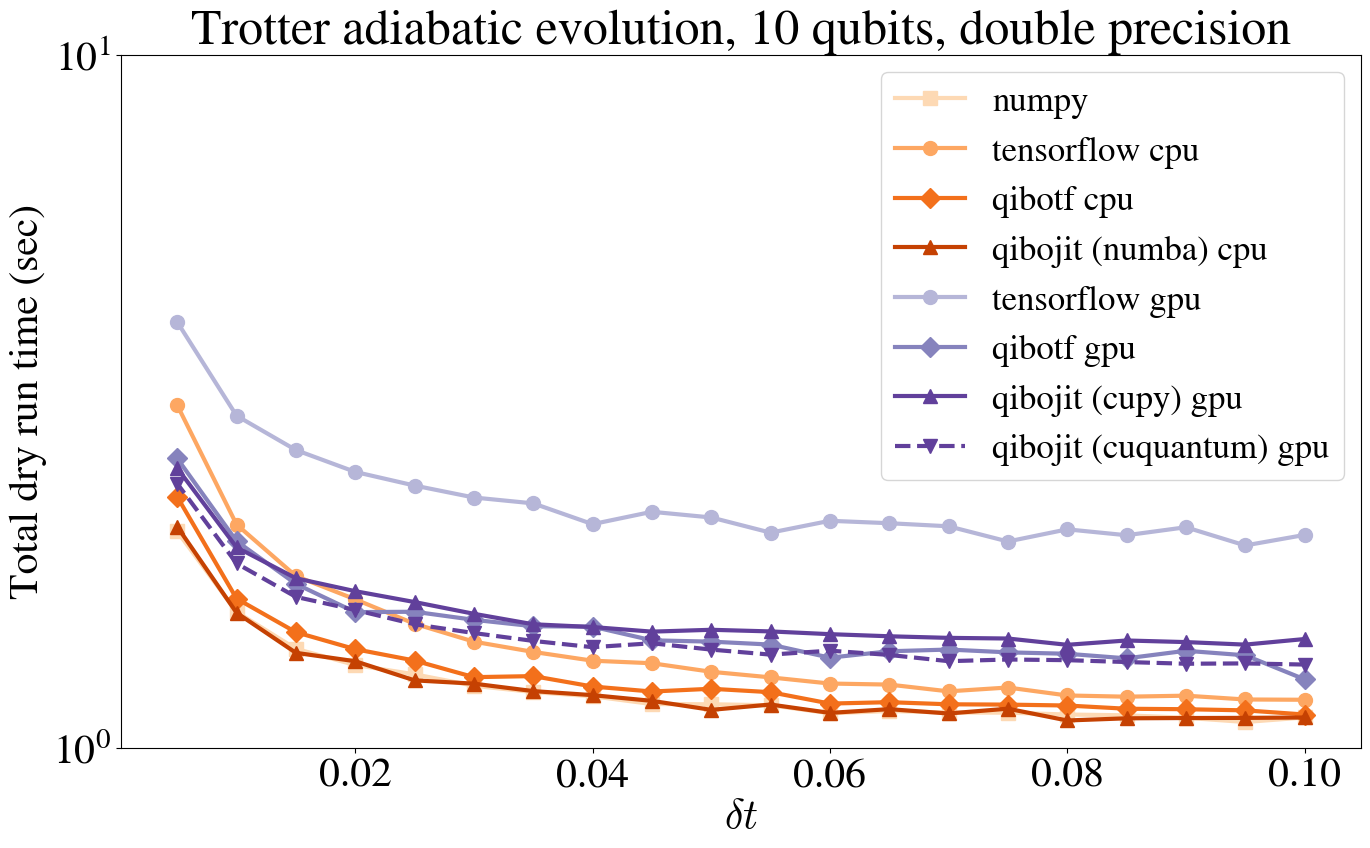

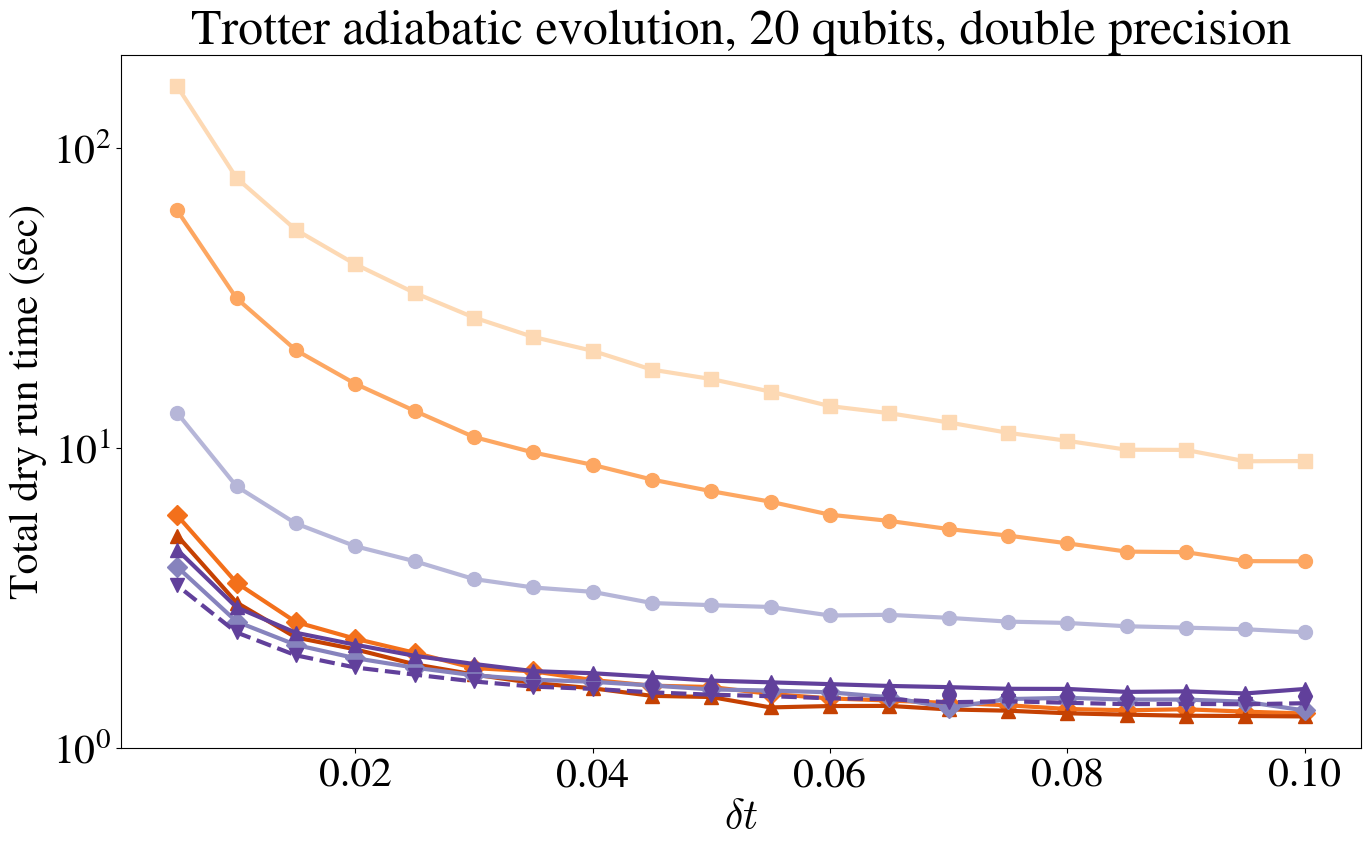

In [24]:
from evolution import plot_trotter

data = load_evolution_data(r"C:\Users\nithy\Desktop\qibo-benchmarks-nith\ev.dat")
plot_trotter(data, "total_dry_time", 10, yticks=[1, 10], legend=True, save=save)
plot_trotter(data, "total_dry_time", 20, yticks=[1, 10, 100], legend=False, save=save)